# El Ramo Azul de Octavio Paz

### Instrucciones: Elige al menos 2 herramientas de etiquetado y una vez aplicado al texto responder las siguientes preguntas:

1. ¿Cuántas palabras hay en el texto? (descartando símbolos de puntuación).

2. ¿Cuántas palabras diferentes hay?

3. Después de lematizar las palabras, ¿cuántas palabras diferentes hay?.

4. ¿Cuál es la diversidad léxica del texto dado? (relación de palabras únicas con respecto al número total de palabras).

5. ¿Cuáles son las 20 palabras (únicas) más frecuentes en el texto? ¿Cuál es su frecuencia?.

6. ¿Cuál es el número promedio de palabras por oración?.

7. ¿Cuál es la frecuencia de de sustantivos, adjetivos y verbos en el texto?.

8. Hacer una gramática que analice las tres primeras oraciones.

In [2]:
import herramientas
import matplotlib.pyplot as plt

In [3]:
#Obtención del texto crudo

texto= herramientas.obtener_texto( 'elramoazul.txt' )
archivo= herramientas.obtener_texto( 'elramoazul.txt', True )

In [4]:
palabras= herramientas.obtener_palabras( texto )

palabras_sin_simbolos= herramientas.obtener_palabras_filtradas( palabras, unicas=False, todo_minuscula=False )
palabras_sin_simbolos_unicas= herramientas.obtener_palabras_filtradas( palabras, todo_minuscula=False )
lemas= herramientas.obtener_lemas( palabras_sin_simbolos )

frecuencias= herramientas.obtener_frecuencias( palabras_sin_simbolos, True )

oraciones= herramientas.obtener_oraciones( archivo )
n_prom= herramientas.obtener_promedio_palabras( oraciones )

oraciones_nltk= herramientas.obtener_oraciones_nltk( texto )
n_prom_nltk= herramientas.obtener_promedio_palabras( oraciones_nltk )

etiquetado_palabras= herramientas.obtener_etiquetado( palabras_sin_simbolos )
etiquetado_texto= herramientas.obtener_etiquetado( texto )

frecuencias_etiquetado_palabras= herramientas.obtener_frecuencias( list(etiquetado_palabras.values()) )
frecuencias_etiquetado_texto= herramientas.obtener_frecuencias( list(etiquetado_texto.values()) )

# Algunos resultados

El texto  de Octavio Paz tuvo los siguientes resultados: 

El texto entero tiene una longitud de  4705, con 37 al leer cada línea y 105 al usar la biblioteca de nltk.
Se contaron 505 palabras diferentes sin usar algún filtro y 505 al usar un filtro para los símbolos
Al lematizar las palabras filtradas se obtuvieron 397 lemas únicos, con una riqueza léxica de 0.9247524752475248
En la gráfica de abajo se muestra la frecuencia de las palabras 


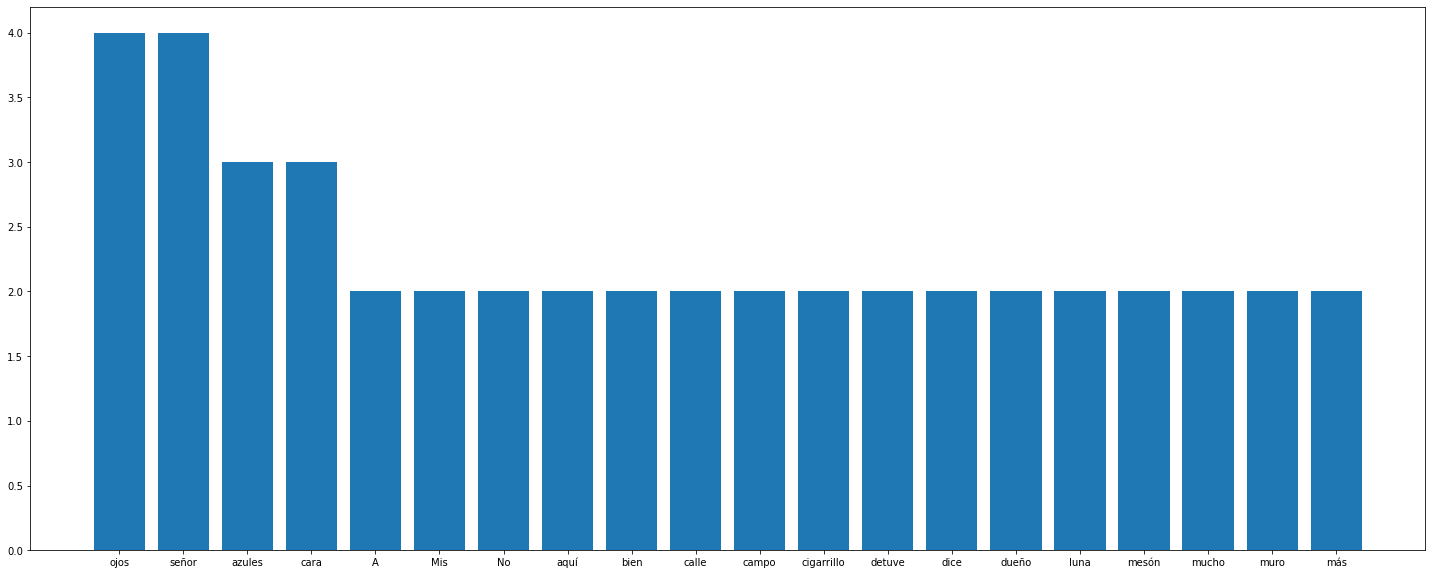

El número promedio de palabras por oración es 126.16216216216216 usando las oraciones si nltk y 43.8 con nltk
La siguiente gráfica muestra el número de etiquetasdos


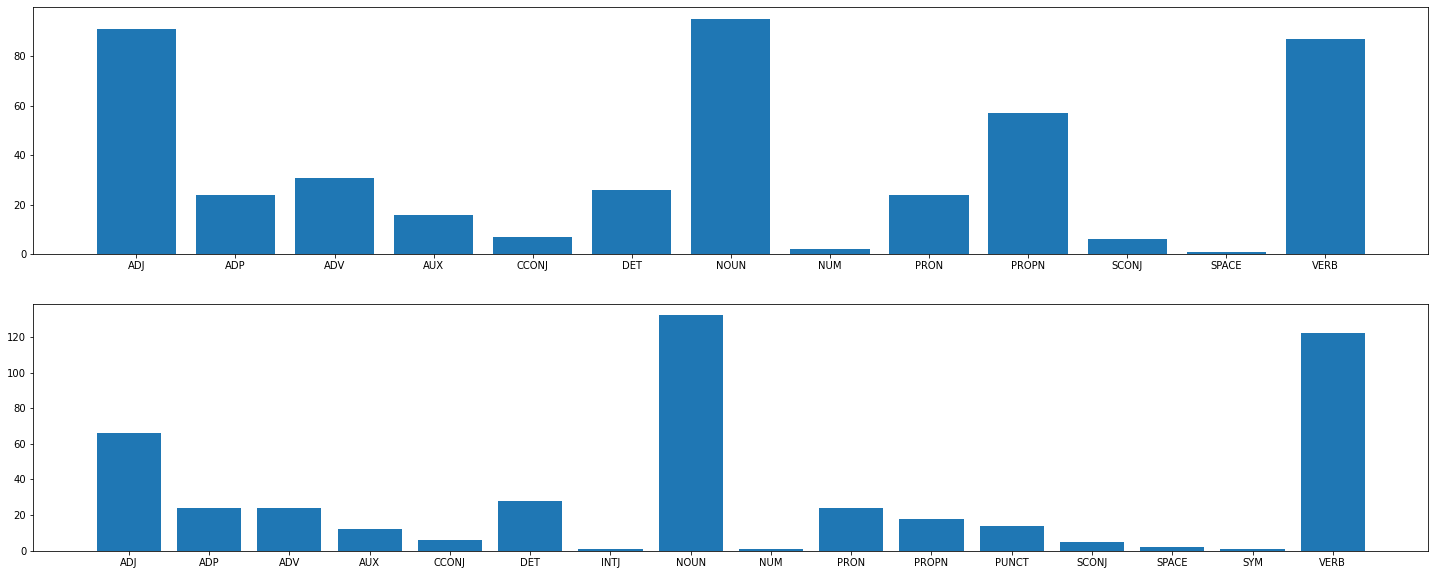

In [5]:
print( "El texto  de Octavio Paz tuvo los siguientes resultados: \n")
print( f"El texto entero tiene una longitud de  { len(texto) }, con {len(oraciones)} al leer cada línea y {len(oraciones_nltk)} al usar la biblioteca de nltk." )
print( f"Se contaron { len(palabras) } palabras diferentes sin usar algún filtro y { len(palabras_sin_simbolos) } al usar un filtro para los símbolos" )
print( f"Al lematizar las palabras filtradas se obtuvieron {len(lemas)} lemas únicos, con una riqueza léxica de {len(palabras_sin_simbolos_unicas)/len(palabras_sin_simbolos)}")
print( "En la gráfica de abajo se muestra la frecuencia de las palabras ")

plt.figure(figsize=(25,10))
plt.bar( list( frecuencias.keys() )[:20], list( frecuencias.values() )[:20] )
plt.show()

print( f"El número promedio de palabras por oración es {n_prom} usando las oraciones si nltk y {n_prom_nltk} con nltk" )
print("La siguiente gráfica muestra el número de etiquetasdos")


plt.figure(figsize=(25,10))

plt.subplot(2,1,1)
plt.bar( list( frecuencias_etiquetado_palabras.keys() )[:20], list( frecuencias_etiquetado_palabras.values() )[:20] )


plt.subplot(2,1,2)
plt.bar( list( frecuencias_etiquetado_texto.keys() )[:20], list( frecuencias_etiquetado_texto.values() )[:20] )

plt.show()


# Recomendación de ortografia

Realizar diferentes correctores ortográficos tomando en consideración:
* La distancia
* Las iniciales de las palabras
* Un tipo de medida

Se debe probar cada uno de los correctores con la siguiente lista de palabras
 ```[python]
palabras= ['cormulent', 'incendenece', 'validrate']
```
### Recomendador 1
Usar la distancia de Jaccard.

### Recomendador 2
Distancia de Jaccard en los 4 gramas de las dos palabras.

### Recomendador 3
Distancia de edicion en las dos palabras con transposiciones

-------
Todas los recomendadores deben regresar una lista de longitud tres que siga la siguiente forma 
```[python]
['recomendacion_cormulent’,
'recomendacion_incendenece', 'recomendacion_validrate']
```

In [7]:
from nltk.corpus import words

palabras_correctas = words.words()
palabras_malas= ['cormulent', 'incendenece', 'validrate']


### Usando el recomendador 1 con la distancia de Jaccard

In [9]:
for palabra_mala in palabras_malas:
    print( f"Corrección para la palabra {palabra_mala} ")
    print( herramientas.corrector_ortografico( palabra_mala, palabras_correctas ) )

Corrección para la palabra cormulent 
['counterenamel', 'clutterment', 'coenocentrum']
Corrección para la palabra incendenece 
['incide', 'incidence', 'indecence']
Corrección para la palabra validrate 
['vitrailed', 'velardenite', 'verticillated']


### Usando el recomendador 2 con la distancia de Jaccard y 4 gramas de las dos palabras

In [10]:
for palabra_mala in palabras_malas:
    print( f"Corrección para la palabra {palabra_mala} ")
    print( herramientas.corrector_ortografico( palabra_mala, palabras_correctas, 2 ) )

Corrección para la palabra cormulent 
['cormus', 'corpulent', 'crapulent']
Corrección para la palabra incendenece 
['incendiary', 'incendivity', 'indene']
Corrección para la palabra validrate 
['valid', 'validly', 'validate']
